In [1]:
import inca

In [2]:
import numpy as np
import pandas as pd

In [3]:
# running scraper and retrieving first article 
mijnscraper = inca.scrapers.news_scraper.nu()   # make an instance of a nu.nl scraper
mijnscraper.run() # run the scraper. It takes the last articles from nu.nl and puts them into ELastic Search
inca.core.document_class.doctype_first('nu')  # retrieve one article from elasticsearch
mijntekst = inca.core.document_class.doctype_first('nu')  # play around
type(mijntekst)
mijntekst[0]['_source'].keys()
#print(mijntekst[0]['_source']['text'])

dict_keys(['title_rss', 'teaser_rss', 'publication_date', 'htmlsource', 'feedurl', 'url', 'category', 'teaser', 'text', 'byline', 'title', 'images', 'META', 'doctype'])

In [ ]:
from inca import Inca
client = Inca()

In [135]:
from scrapers.parliamentanswers_scraper import parliamentanswers_NL

par = parliamentanswers_NL()
par = par.run()

#par = inca.scrapers.news_scraper.parliamentanswers()

In [5]:
#Retreiving docs from ES with generator
#del doc
#del generator
from inca import Inca
client = Inca() # assumes elasticsearch is running
generator = client.database.doctype_generator('nu') # in case of nrc and nos, ('nos (www)'))
for doc in generator:
    #print(doc['_source'].keys())

SyntaxError: unexpected EOF while parsing (<ipython-input-5-c84abf8c8477>, line 8)

## Query practice

In [19]:
#Simple Queries

#connect to our cluster
from elasticsearch import Elasticsearch
es = Elasticsearch([{'host': '127.0.0.1', 'port': 9200}])
#print (help(es.explain))
#print (help(es.info))
#print (help(es.get))

In [129]:
help(es.get)

In [61]:
es.get(index='inca',doc_type='nu',id = 'put smth')

In [58]:
print ( es.search(index='inca', body={"query": {"match": {'doctype':'nu'}}}).get('hits').get('hits')[2].keys() )

dict_keys(['_index', '_type', '_id', '_score', '_source'])


In [103]:
es.search(index='inca', body={'query':{"bool": { 'must': [ {'query_string':{'query':'*'}}]}},
                             'aggs':{'timeline' : {"date_histogram": {
                                 "field":'META.ADDED',
                                 "interval":'1d'
                             } }}})   #get('hits').get('hits')[0]

{'_shards': {'failed': 0, 'successful': 5, 'total': 5},
 'aggregations': {'timeline': {'buckets': [{'doc_count': 10,
     'key': 1509580800000,
     'key_as_string': '2017-11-02T00:00:00.000Z'},
    {'doc_count': 19,
     'key': 1509667200000,
     'key_as_string': '2017-11-03T00:00:00.000Z'},
    {'doc_count': 0,
     'key': 1509753600000,
     'key_as_string': '2017-11-04T00:00:00.000Z'},
    {'doc_count': 0,
     'key': 1509840000000,
     'key_as_string': '2017-11-05T00:00:00.000Z'},
    {'doc_count': 199,
     'key': 1509926400000,
     'key_as_string': '2017-11-06T00:00:00.000Z'}]}},
 'hits': {'hits': [{'_id': 'https://www.nu.nl/-/4991282/',
    '_index': 'inca',
    '_score': 1.0,
    '_source': {'META': {'ADDED': '2017-11-03T13:54:30.738721',
      '_id': {'ADDED_AT': '2017-11-03T13:54:30.738721',
       'ADDED_METHOD': None,
       'ADDED_USING': "'scrapers.news_scraper.nu'>",
       'FUNCTION_ARGUMENTS': {},
       'FUNCTION_TYPE': 'scraper',
       'FUNCTION_VERSION': '.1',


In [78]:
res = es.search(index="inca", doc_type="nrc (www)", body={"query": {"match": {"title_rss": "amsterdam"}}})
print("%d documents found" % res['hits']['total'])
for doc in res['hits']['hits']:
    print("%s) %s" % (doc['_id'], doc['_source']['title_rss']))

1 documents found
http://www.nrc.nl/1579930) NRC checkt: ‘Eindhoven ontvangt 125 keer minder  dan Amsterdam’


In [127]:
es.search(index='inca', doc_type = 'nrc (www)', body={"query": {"query_string": {'query': 'Trump'}}})

In [128]:
es.search(index='inca', doc_type = 'nrc (www)', body={"query": {"query_string": {'query': 'Texas', 'fields':['teaser_rss']}}})

# there are two articles where Texas is mentioned in the teaser_rss, but there are five 'hits'

In [ ]:
res = es.search(index="inca", body={"query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total'])
for hit in res['hits']['hits']:
    print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])

In [91]:
inca.core.search_utils.doctype_fields('nrc (www)')

{'byline': {'coverage': 0.0, 'type': 'text'},
 'category': {'coverage': 0.0, 'type': 'text'},
 'doctype': {'coverage': 0.0, 'type': 'text'},
 'feedurl': {'coverage': 0.0, 'type': 'text'},
 'htmlsource': {'coverage': 0.0, 'type': 'text'},
 'publication_date': {'coverage': 0.0, 'type': 'date'},
 'teaser': {'coverage': 0.0, 'type': 'text'},
 'teaser_rss': {'coverage': 0.0, 'type': 'text'},
 'text': {'coverage': 0.0, 'type': 'text'},
 'title': {'coverage': 0.0, 'type': 'text'},
 'title_rss': {'coverage': 0.0, 'type': 'text'},
 'url': {'coverage': 0.0, 'type': 'text'}}

### GETTING TIMELINE 

In [42]:
from analysis import timeline_analysis as ta

In [32]:
#examining parliamnetnews data 
inca.core.search_utils.doctype_first('parliamentary answers NL', num = 1)[0]['_index']

'inca'

In [43]:
proba = ta.timeline_generator()
smth = proba.analyse(queries=['de','het'],timefield = 'META.ADDED', granularity = 'day')

In [12]:
#smth =  smth.fillna(0,axis=0)
#df = smth[smth['1. Rutte   ']!=0]

In [44]:
smth.index = smth.timestamp
df = smth.drop('timestamp',axis=1)
df

,1. de,2. het
timestamp,,
2017-11-02T00:00:00.000Z,10,10
2017-11-03T00:00:00.000Z,19,19
2017-11-04T00:00:00.000Z,0,0
2017-11-05T00:00:00.000Z,0,0
2017-11-06T00:00:00.000Z,199,198
2017-11-07T00:00:00.000Z,0,0
2017-11-08T00:00:00.000Z,143,143
2017-11-09T00:00:00.000Z,0,0
2017-11-10T00:00:00.000Z,0,0


## Statsmodels testing

In [94]:
# generate two arbitrary sample to work with, put them in df, add time trend
sample1 = np.random.gamma(4,3,50)
sample2 = np.random.binomial(10,0.7,size=50)

# create a pandas dataframe with counts of mentions of a particular word (two arrays)
df = pd.DataFrame({'x':sample1, 'y':sample2})
df['t'] = df.index
df['x'] = df.x.astype('int')
df = df.drop(['t'],axis=1)

#make index a date object
import datetime
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, 50)]

df.index = date_list

In [46]:
#preprocessing for generated df 
df.index = df.timestamp
df = df.drop('timestamp',axis=1)
df

AttributeError: 'DataFrame' object has no attribute 'timestamp'

In [96]:
#VAR
#REQUIREMENTS 
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib as plt
import pandas as pd
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.statespace.tools import diff
  
model = VAR(df)
res = model.fit()

#res.summary()

In [97]:
#df['x'] = detrend(df['x'],1)
xx = detrend(df['x'],1)
#df['y'] = df['y'].detrend(1)
yy = detrend(df['y'],1)

In [98]:
x = pd.DataFrame(columns=df.columns)

In [99]:
x['x'] = xx
x['y'] = yy

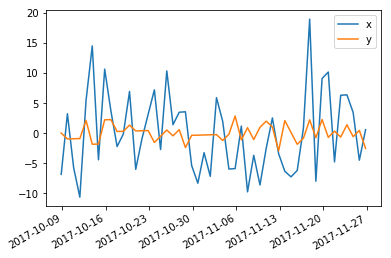

In [104]:
x.plot()
pyplot.show()

In [101]:
 diff_flag = _stationary(df) 
            if (adf_flag == False | kpss_flag == False):
                print('Do you want to take differences? do delta_ x = x_(t) - x_(t-order) ?  [y/n]')
                diff_answer = input()
                if (diff_answer == 'y'):
                    diff_flag = True 
            else:
                print('you dont want to take differneces. it is ok') ##
                diff_flag == False

IndentationError: unexpected indent (<ipython-input-101-0fb4e2986f15>, line 2)

In [23]:
# Perform ADF test 
X = df.x
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
summary_adf = pd.DataFrame(columns=['ADF_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
for name in df.columns:
    series = df[name]
   
    result = adfuller(series)
    #print(result)
    dic = {'ADF_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[4]['1%'],'Critical_val_5%':result[4]['5%'],'Critical_val_10%':result[4]['10%']}
    #print(dic)
    summary_adf = summary_adf.append(dic,ignore_index=True)
    #print (summary_adf)
summary_adf.set_index(df.columns,inplace=True)  
print (summary_adf)    

AttributeError: 'DataFrame' object has no attribute 'x'

In [114]:
#Perform kpss test 
#REQUIREMENTS
from statsmodels.tsa.stattools import kpss

X = df.x
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
print()

summary_kpss = pd.DataFrame(columns=['KPSS_Stat','p-value','Critical_val_1%','Critical_val_5%','Critical_val_10%'])
for name in df.columns:
    series = df[name]
    #rint(series)
    result = kpss(series)
    #print(result)
    dic = {'KPSS_Stat':result[0],'p-value':result[1],'Critical_val_1%':result[3]['1%'],'Critical_val_5%':result[3]['5%'],'Critical_val_10%':result[3]['10%']}
    #print(dic)
    summary_kpss = summary_kpss.append(dic,ignore_index=True)
    #print (summary_kpss)
summary_kpss.set_index(df.columns,inplace=True)  
print (summary_kpss)

KPSS Statistic: 0.161782
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

   KPSS_Stat   p-value  Critical_val_1%  Critical_val_5%  Critical_val_10%
x   0.161782  0.100000            0.739            0.463             0.347
y   0.367041  0.091362            0.739            0.463             0.347


C:\Users\HP\Anaconda2\envs\inca362\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


C:\Users\HP\Anaconda2\envs\inca362\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


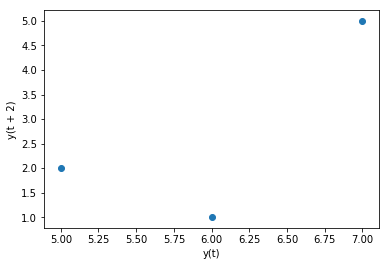

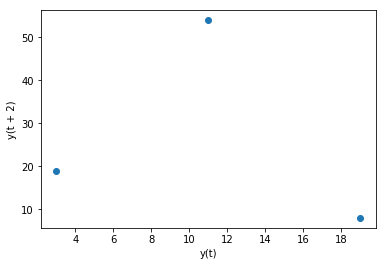

Help on function wrapper in module pandas.tools.plotting:

wrapper(*args, **kwargs)

None


In [24]:
# Plotting functionality to see the time sereis process 
#REQUIREMENTS
#from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot

#lag plots for each variable in dataset
for name in df.columns:
    series = df[name]
    lag_plot(series,2)
    pyplot.show()    

print(help(lag_plot))

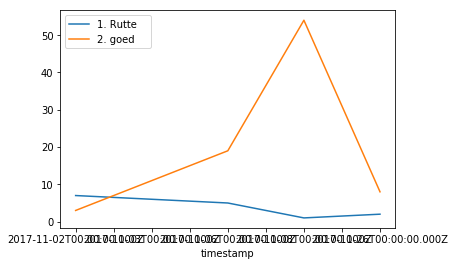

In [25]:
# Line plots for each variable
#REQUIREMENTS
from matplotlib import pyplot

for name in df.columns:
    series = df[name]
    series.plot(legend=True)
pyplot.show()


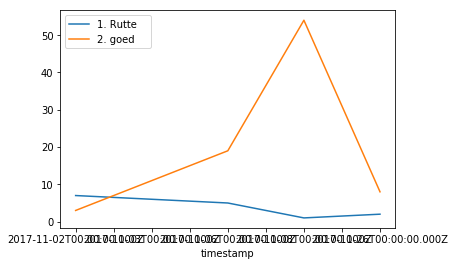

ValueError: operands could not be broadcast together with shapes (9,) (3,) (9,) 

In [26]:
#Autpcorrelations plot 
#from pandas import Series
from matplotlib import pyplot

for name in df.columns:
    series = df[name]
    series.plot(legend=True)
pyplot.show()
from pandas.tools.plotting import autocorrelation_plot
for name in df.columns:
    series = df[name]
    #autocorrelation_plot(series)
    #pyplot.show()
    

#Another way - A BETTER WAY, YOU CAN INDICATE THE NUMBER OF LAGS ! 
from statsmodels.graphics.tsaplots import plot_acf
for name in df.columns:
    series = df[name]
    plot_acf(series, lags=10)
    pyplot.show()


In [27]:
# AUTOCORRELATIONS  TABLE
from statsmodels.tsa.stattools import acf

for name in df.columns:
    series = df[name]
    smth = acf(series,nlags=2,qstat=True)
    proba = smth
    print(proba)

(array([ 1.        ,  0.40895522, -0.19701493]), array([ 1.46338828,  1.91622856]), array([ 0.22639178,  0.3836156 ]))
(array([ 1.        , -0.1542617 , -0.16806723]), array([ 0.20822089,  0.53776448]), array([ 0.64816544,  0.76423325]))


In [28]:
summary_acf = pd.DataFrame(columns=['Auto_cor','Q-value','p-value'])
for name in df.columns:
    series = df[name]
    #rint(series)
    result = acf(series)
    #print(result)
    dic = {'Auto_cor':result[0],'Q-value':result[1]}
    #print(dic)
    summary_acf = summary_acf.append(dic,ignore_index=True)
    #print (summary_kpss)
summary_kpss.set_index(df.columns,inplace=True)  
print (summary_acf)

NameError: name 'summary_kpss' is not defined

ImportError: cannot import name 'analysis_base_class'